In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression


In [18]:
df = pd.read_csv("Player Data.csv")
df.set_index('Unnamed: 0')
len(df)

618

In [19]:
X = df[['Unnamed: 0','selected_by_percent', 'minutes','influence', 'creativity', 'threat', 'goals_scored', 'assists','clean_sheets', 'goals_conceded', 'own_goals', 'penalties_saved','penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus','Avg Playtime']]
y = df['total_points']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [21]:
def test_model(model):
    reg = model.fit(X_train_scale, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scale, y_train)}')
    print(f'Test Score: {reg.score(X_test_scale, y_test)}\n')
    print()
    plt.scatter(y_test, model.predict(X_test_scale))
    plt.show()

Model: LinearRegression
Train score: 0.9738609928139896
Test Score: 0.9685163690220433




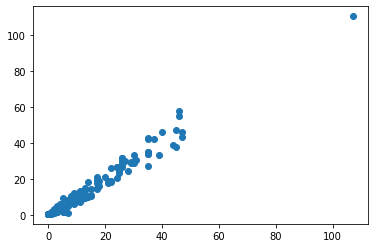

Model: KNeighborsRegressor
Train score: 0.9510649721042498
Test Score: 0.859757337921565




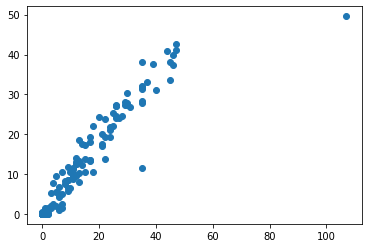

Model: RandomForestRegressor
Train score: 0.9922080900240344
Test Score: 0.878936635910117




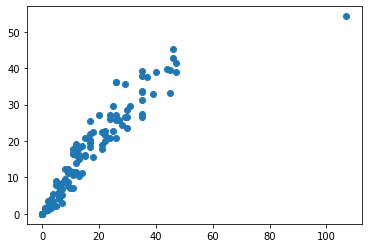

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.8989063343165258




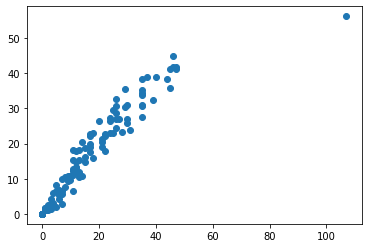

Model: AdaBoostRegressor
Train score: 0.9349859682371973
Test Score: 0.848785374828998




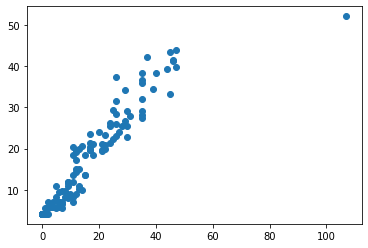

In [22]:
test_model(LinearRegression())
test_model(KNeighborsRegressor())
test_model(RandomForestRegressor())
test_model(ExtraTreesRegressor())
test_model(AdaBoostRegressor())

In [23]:
feat_sel = LinearRegression().fit(X_train_scale, y_train)
features = feat_sel.coef_
feature_df = pd.DataFrame({
    "Features": X.columns,
    "Coeffs": features}).sort_values(by='Coeffs', ascending=False)
feature_df

,Features,Coeffs
17,Avg Playtime,3.548723
2,minutes,3.548723
8,clean_sheets,3.171524
6,goals_scored,3.096505
16,bonus,2.391202
7,assists,1.946456
3,influence,0.894878
15,saves,0.661381
1,selected_by_percent,0.410261
11,penalties_saved,0.134774
